<a href="https://colab.research.google.com/github/SarahGoddaer/Machine_Learning_course_UGent_D012554_kaggle/blob/master/4%3A%20SVM%20better%20version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fourth try: Support vector machines 2.0

The fourth time I sent my predictions in, it was actually the same model as in de third try, but just with other hyperparameters, so that is what you will find here.

In [0]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn import metrics

**Loading data**

In [37]:
trainset = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_train.csv")
testset = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_test.csv")

features = trainset.copy()
features.pop('label')
feature_names = list(features.columns)

test_features = testset.copy()
test_features.pop('index')
test_feature_names = list(test_features.columns)
features.describe()

,AF3,F7,F3,FC5,T7,P7,O1,02,P8,T8,FC6,F4,F8,AF4
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,4300.157125,4009.273150,4263.860860,4122.616195,4341.606870,4620.061720,4072.151250,4615.229300,4200.893915,4230.573235,4201.583060,4278.445325,4605.169335,4359.852780
std,36.361719,29.853264,20.788323,20.565528,16.691038,18.034865,20.933632,18.391027,17.810272,19.661149,24.397269,19.645651,33.067591,37.074555
min,4197.950000,3905.640000,4202.560000,4058.460000,4310.260000,4569.740000,4032.820000,4571.280000,4147.690000,4158.970000,4107.180000,4216.410000,4454.360000,4225.640000
25%,4280.510000,3990.770000,4250.260000,4108.720000,4331.790000,4611.790000,4057.440000,4604.100000,4190.260000,4219.490000,4189.740000,4267.180000,4590.642500,4342.050000
50%,4293.330000,4006.150000,4262.560000,4121.030000,4338.460000,4617.950000,4069.740000,4612.820000,4199.490000,4228.720000,4200.000000,4276.410000,4603.080000,4354.360000
75%,4309.740000,4023.590000,4270.260000,4133.460000,4347.180000,4626.150000,4083.590000,4623.080000,4209.230000,4238.970000,4211.280000,4286.150000,4617.950000,4371.790000
max,4497.440000,4152.820000,4385.640000,4234.360000,4452.820000,4754.870000,4174.870000,4731.280000,4315.380000,4352.310000,4325.640000,4397.950000,4796.920000,4538.970000


**Pre-processing: StandardScaler** Because on the web this was more adviced to use with support vector machines.

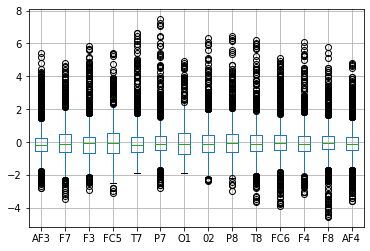

In [38]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler()
features = scaler.fit_transform(features)
test_features = scaler.transform(test_features)

features = pd.DataFrame(features, columns=feature_names)
test_features = pd.DataFrame(test_features, columns=test_feature_names)
features.boxplot()

##**Support vector machines** algorithm. This also distinguishes two classes.

In [0]:
from sklearn.svm import SVC
model = SVC()

In [40]:
score_train = cross_val_score(model, features, trainset.label,scoring='roc_auc', cv= 10).mean()
print('AUC score for trainset: '+ str(score_train))

AUC score for trainset: 0.8942757252940738


Waaw you can already see that this score is much better then the score obtained with Logistic regression, which was around 66%.

Maybe we could optimize this model a bit more, so I'm now going to search better hyperparameters inherent to this model: **Parameter tuning** Because I think this is the next logical step, right?

In [6]:
#How do the parameters look like in this model?
model.get_params

<bound method BaseEstimator.get_params of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)>

In [7]:
from sklearn.model_selection import GridSearchCV

Cs = [1,10, 20, 50, 80, 100]
gammas = ['scale', 'auto',1, 0.01]

model = SVC()
params = dict(C=Cs, gamma=gammas)
grid_search = GridSearchCV(model, param_grid=params)
grid_search.fit(features, trainset.label)

print(grid_search.best_estimator_)
print(grid_search.best_params_)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
{'C': 10, 'gamma': 1}


Well ok, these results suggest to use C=10 and gamma = 1 as hyperparameters.

In [63]:
model=SVC(C=10,gamma=1, probability=True)
score = cross_val_score(model, features, trainset.label,scoring='roc_auc', cv= 10).mean()
print('AUC score for trainset: '+ str(score))

AUC score for trainset: 0.9625710354884667


In [25]:
model.fit(features,trainset.label)
predictions = model.predict_proba(test_features)[:,1]

sample_submission = pd.DataFrame({'index': testset['index'], 'label': predictions})
sample_submission.head()

,index,label
0,0,0.003482
1,1,0.361247
2,2,0.006905
3,3,0.996765
4,4,0.945445


In [0]:
filename = "my_prediction_results4.csv"
sample_submission.to_csv(filename,index=False)

If we would want to take a closer look into the results of the GridsearchCV:

In [11]:
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

for mean_score, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("{:.3f} (+/-{:.3f}) for {}".format(mean_score, std * 2, params))

0.812 (+/-0.035) for {'C': 1, 'gamma': 'scale'}
0.811 (+/-0.038) for {'C': 1, 'gamma': 'auto'}
0.901 (+/-0.032) for {'C': 1, 'gamma': 1}
0.678 (+/-0.042) for {'C': 1, 'gamma': 0.01}
0.870 (+/-0.042) for {'C': 10, 'gamma': 'scale'}
0.870 (+/-0.045) for {'C': 10, 'gamma': 'auto'}
0.908 (+/-0.026) for {'C': 10, 'gamma': 1}
0.747 (+/-0.007) for {'C': 10, 'gamma': 0.01}
0.886 (+/-0.037) for {'C': 20, 'gamma': 'scale'}
0.886 (+/-0.037) for {'C': 20, 'gamma': 'auto'}
0.908 (+/-0.026) for {'C': 20, 'gamma': 1}
0.772 (+/-0.018) for {'C': 20, 'gamma': 0.01}
0.890 (+/-0.031) for {'C': 50, 'gamma': 'scale'}
0.889 (+/-0.030) for {'C': 50, 'gamma': 'auto'}
0.908 (+/-0.026) for {'C': 50, 'gamma': 1}
0.802 (+/-0.031) for {'C': 50, 'gamma': 0.01}
0.889 (+/-0.035) for {'C': 80, 'gamma': 'scale'}
0.889 (+/-0.035) for {'C': 80, 'gamma': 'auto'}
0.908 (+/-0.026) for {'C': 80, 'gamma': 1}
0.810 (+/-0.036) for {'C': 80, 'gamma': 0.01}
0.890 (+/-0.031) for {'C': 100, 'gamma': 'scale'}
0.889 (+/-0.035) for {'C

Everything from here are just ideas that I still need to work out, so don't look at it.

I'll try something different on this later, maybe within a few days I will look into this bagging methods, and maybe I could apply it to this model because I think the complexity is becoming rather high with these parameters. So it is a model with low bias, but high variance.

In [0]:
#Basically just copy/paste, so this cell is not relevant now
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

clf = BaggingClassifier(base_estimator=SVC(),
                        n_estimators=100, random_state=0).fit(features, trainset.label)

score_train = cross_val_score(clf, features, trainset.label,scoring='roc_auc', cv= 10).mean()
print('AUC score for trainset: '+ str(score_train))

AUC score for trainset: 0.625344491390363


# Further trying to improve this model: feature selection!

For classification: chi2, f_classif, mutual_info_classif

In [0]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif 
from sklearn.pipeline import make_pipeline

anova_filter = SelectKBest(mutual_info_classif, k=12)
clf = SVC(C=10,gamma=1, probability=True)

anova_svm = make_pipeline(anova_filter, clf)
anova_svm.fit(features, trainset.label)
y_pred = anova_svm.predict(test_features)


In [57]:
model=anova_svm
score = cross_val_score(model, features, trainset.label,scoring='roc_auc', cv= 10).mean()
print('AUC score for trainset: '+ str(score))

AUC score for trainset: 0.919701767142134


I think that it isn't wise to leave out some features, because AUC score isn't improving at all if you leave out some features...

Everything beneath this cell are just some idea's that are not examined yet..

##svc bagging

I will try to use a bagging method on this model to somehow reduce variance of this complex model.

In [0]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator=model, n_estimators=10, random_state=0).fit(features, trainset.label)


In [0]:
clf.cross_val_score(model, features, trainset.label,scoring='roc_auc', cv= 10).mean()

AttributeError: ignored

##K-nearest neighbour algorithm

Maybe I can try this too? We'll see.. This don't realy needs to be in this notebook, but it's an idea that I can explore maybe one of the next days.

First **loading data**